In [38]:
# Importando os módulos
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline
from sklearn import metrics

from sklearn.model_selection  import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.externals import joblib
from sklearn.tree import DecisionTreeRegressor

In [39]:
df1 = pd.read_csv("dados_limitecredito.csv")

In [40]:
df1

,ID,historico_credito,divida,garantias,renda,Risco
0,1,1,2,1,10000,3
1,2,2,2,1,28000,3
2,3,2,1,1,29000,2
3,4,2,1,1,38900,3
4,5,2,1,1,40000,1
5,6,2,1,2,40000,1
6,7,1,1,1,12000,3
7,8,1,1,2,43222,2
8,9,3,1,1,56000,1
9,10,3,2,2,45600,1


In [54]:
data_treino = np.array(df1[['historico_credito', 'divida', 'garantias', 'renda']])
data_classif = np.array(df1['Risco'])
X_treino, X_teste, Y_treino, Y_teste = train_test_split(data_treino, data_classif, test_size=0.30)

In [55]:
modelo_RL = LinearRegression()
modelo_RL.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
joblib.dump(modelo_RL, 'risco_de_credito_lucas_sodre_pos.pkl')

['risco_de_credito_lucas_sodre_pos.pkl']

In [57]:

res = modelo_RL.predict([[int('1000'),int(1), int(1), int(1)]])
print res

[-615.67178392]


In [45]:
print modelo_RL.coef_

[-6.19079267e-01  5.71576962e-01 -3.64593226e-01 -1.31358352e-05]


In [46]:
print modelo_RL.score


<bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [47]:
modelo_tree = DecisionTreeRegressor()

In [48]:
arvore_classificacao = modelo_tree.fit(x_treino, y_treino)

In [60]:
res = arvore_classificacao.predict([[int('290000'),int(3), int(2), int(2)]])
print res == 2

[ True]


In [50]:
arvore_classificacao.tree_

In [51]:
arvore_classificacao.classes_

In [52]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

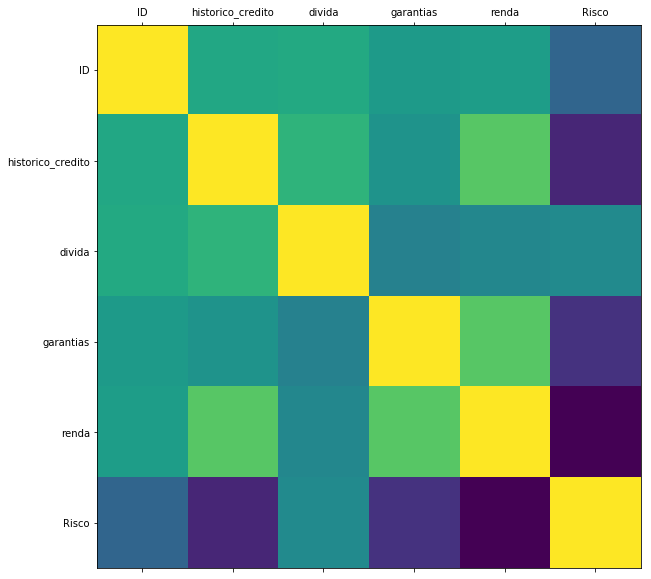

In [53]:
plot_corr(df1)

In [58]:
joblib.dump(modelo_tree, 'risco_de_credito_lucas_sodre_pos1.pkl')

['risco_de_credito_lucas_sodre_pos1.pkl']